In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [14]:
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

In [15]:
df=pd.read_csv(url)

In [16]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1203,51,male,32.300,1,no,northeast,9964.06000
1119,30,female,19.950,3,no,northwest,5693.43050
637,35,female,38.095,2,no,northeast,24915.04626
533,37,male,36.190,0,no,southeast,19214.70553
727,29,female,21.755,1,yes,northeast,16657.71745


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
cdf = df[['age','bmi','children','charges']]
cdf.sample(9)

,age,bmi,children,charges
1263,43,29.90,1,7337.7480
977,26,29.15,1,2902.9065
1188,43,25.27,1,21771.3423
1246,45,25.70,3,9101.7980
77,21,35.53,0,1532.4697
407,47,23.60,1,8539.6710
880,22,34.80,3,3443.0640
351,50,25.60,0,8932.0840
1179,31,29.81,0,19350.3689


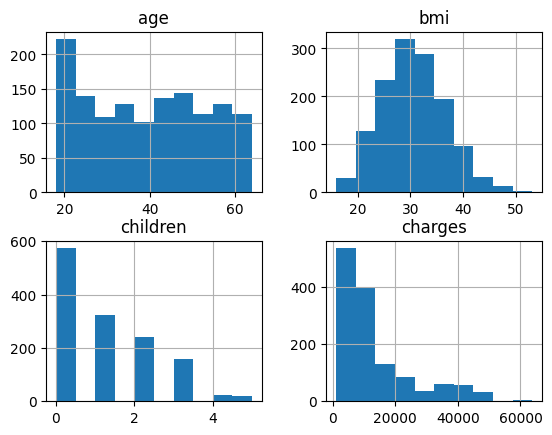

In [19]:
viz = cdf[['age','bmi','children','charges']]
viz.hist()
plt.show()

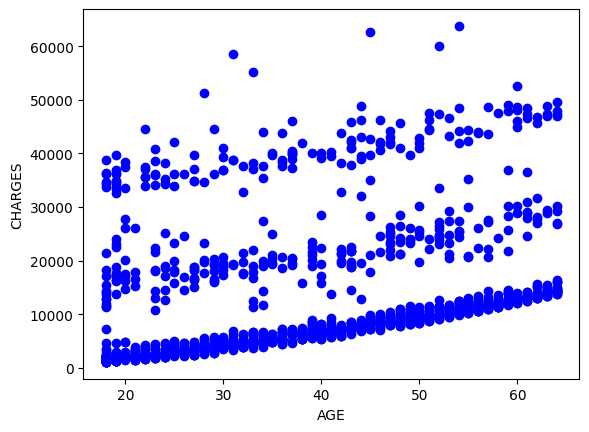

In [22]:
plt.scatter(cdf.age, cdf.charges,  color='blue')
plt.xlabel("AGE")
plt.ylabel("CHARGES")
plt.show()

In [25]:
X = cdf.age.to_numpy()
y = cdf.charges.to_numpy()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (1070,))

In [29]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  240.59655978877493
Intercept:  3876.928684191691


Text(0, 0.5, 'Emission')

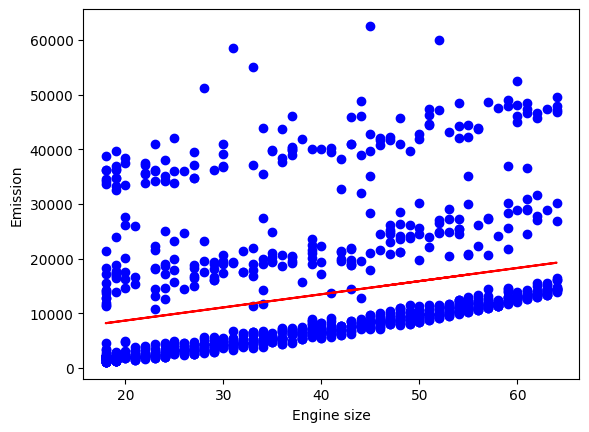

In [30]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_,'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 9173.26
Mean squared error: 135983957.48
Root mean squared error: 11661.22
R2-score: 0.12
